# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# query_url = url + "appid=" + api_key + "&q=" + 'San Jose'
# r = requests.get(query_url).json()
# print(r)

In [4]:
api_key = "5982138c45190b549382b2e32b7e6ac5"
url = 'http://api.openweathermap.org/data/2.5/weather?'

dfw = pd.DataFrame(columns = ['Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lon', 'Max Temp', 'Wind Speed'])

for indx, city in enumerate(cities):
    # Build query URL
    query_url = url + "appid=" + api_key + "&q=" + city
    #print('URL:', query_url)
    r = requests.get(query_url)

    d = r.json()
    if d['cod'] != 200:
        continue # bad reply, go to next city
    name = d['name']
    print(name)
    clouds = d['clouds']['all']
    country = d['sys']['country']
    date = d['dt']
    city_id = d['id']
    humidity = d['main']['humidity']
    max_temp = d['main']['temp_max']
    lng = d['coord']['lon']
    lat = d['coord']['lat']
    wind = d['wind']['speed']
    wdict = {'Cloudiness':clouds, 'Country':country, 'Date':date, 
          'Humidity':humidity, 'Lat':lat, 'Lon':lng, 'Max Temp':max_temp, 'Wind Speed':wind}
    df2 = pd.DataFrame(wdict, index=[city])
    dfw = dfw.append(df2)

Wellington
Shingu
Butaritari
Rikitea
Mataura
Ribeira Grande
Aswan
Punta Arenas
Borovoy
San Patricio
Hofn
Busselton
Vikulovo
Anadyr
Ejido
Saskylakh
Port Alfred
Thompson
Provideniya
Krasnoborsk
Yellowknife
Narsaq
Hermanus
Avarua
Torbay
Cape Town
Ushuaia
New Norfolk
Vaini
San Quintin
Leningradskiy
Petropavlovsk-Kamchatsky
Faanui
Cherskiy
Cidreira
Sterling
Qaanaaq
Jamestown
Timra
Carnarvon
Skibbereen
Inhambane
Ancud
Kruisfontein
Aykhal
Port Elizabeth
Grand Baie
Geraldton
Evensk
Slave Lake
Touros
Tacuarembo
Camana
Hithadhoo
Mayo
Yangi Marg`ilon
Tasiilaq
Tucurui
Gaziantep
Albany
Kulhudhuffushi
Kodiak
Kapaa
Rock Springs
Puerto Ayora
Dakar
Umm Kaddadah
Gamba
Mar del Plata
Tombouctou
Vallenar
Kapit
Kavaratti
Kirkwood
Hilo
Norman Wells
Bandundu
East London
Camapua
George Town
Basco
Bredasdorp
Saldanha
Wawa
Russell
Saint-Philippe
Vao
Charters Towers
Ossora
Meadow Lake
Castro
Ayna
Tilichiki
Loiza
Vysokogornyy
Kutum
Manavalakurichi
Goderich
Chokurdakh
Saint-Augustin
Tessalit
Chipata
Tuktoyaktuk
Mah

In [5]:
dfw

,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
wellington,70,NZ,1581616702,87,-41.29,174.78,289.82,6.70
shingu,30,JP,1581616767,71,33.73,135.98,287.04,1.22
butaritari,100,KI,1581616768,79,3.07,172.79,301.41,7.89
rikitea,100,PF,1581616768,77,-23.12,-134.97,298.89,6.77
mataura,96,NZ,1581616768,83,-46.19,168.86,283.15,1.34
...,...,...,...,...,...,...,...,...
honiara,75,SB,1581616929,100,-9.43,159.95,298.15,1.00
porto novo,0,BJ,1581616929,59,6.50,2.60,301.12,3.72
port hedland,0,AU,1581616929,88,-20.32,118.57,300.15,4.10
peace river,90,CA,1581616930,85,56.25,-117.29,266.48,1.50


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
dfw.to_csv("city_data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

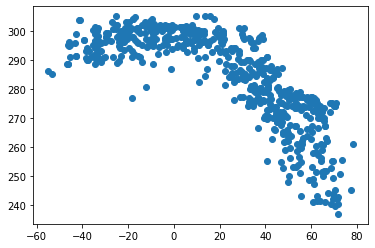

In [13]:
plt.scatter(dfw["Lat"],dfw["Max Temp"])

Latitude vs. Humidity Plot

#### Latitude vs. Humidity Plot

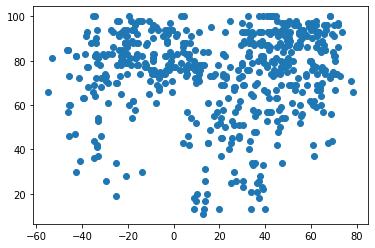

In [14]:
plt.scatter(dfw["Lat"], dfw["Humidity"])

#### Latitude vs. Cloudiness Plot

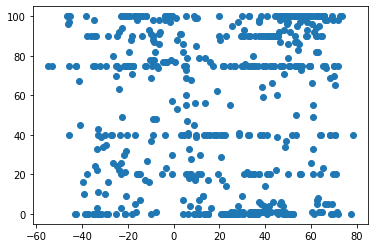

In [15]:
plt.scatter(dfw["Lat"], dfw["Cloudiness"])

#### Latitude vs. Wind Speed Plot

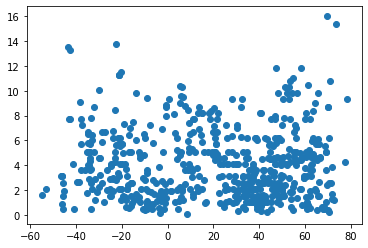

In [16]:
plt.scatter(dfw["Lat"], dfw["Wind Speed"])

## Linear Regression

In [22]:
# OPTIONAL: Create a function to create Linear Regression plots
def l_reg(x_values, y_values, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    plt.show()
    return rvalue

In [23]:
# Create Northern and Southern Hemisphere DataFrames
north_dfw = dfw.loc[(dfw['Lat'] >=0)]
south_dfw = dfw.loc[(dfw['Lat'] <0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

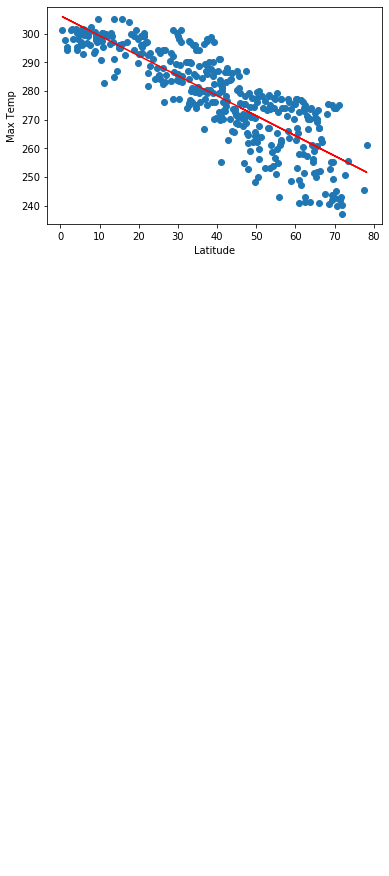

-0.8417991983915204

In [24]:
x_values = north_dfw['Lat']
y_values = north_dfw['Max Temp']
l_reg(x_values, y_values, "Max Temp")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

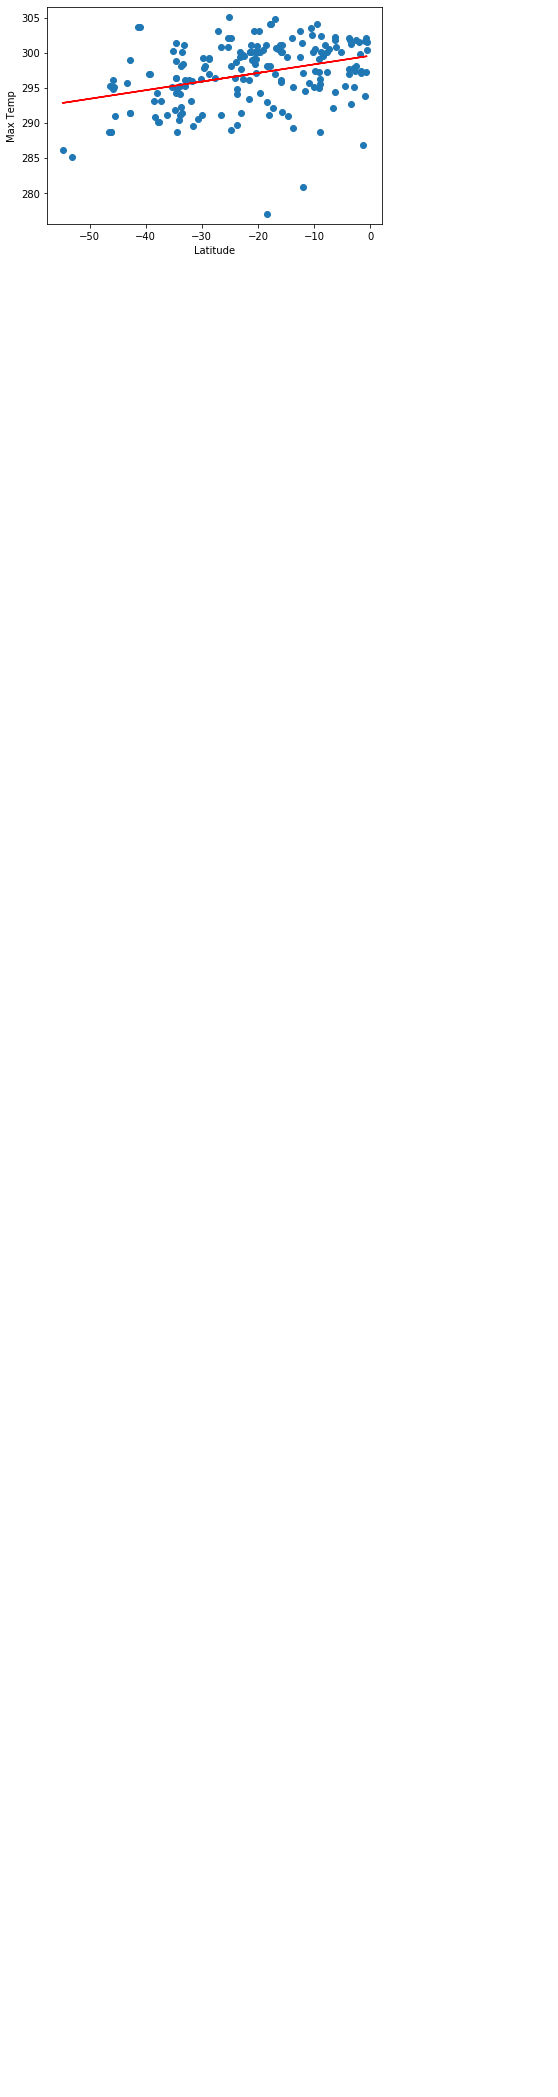

In [33]:
x_values = south_dfw['Lat']
y_values = south_dfw['Max Temp']
r_value=l_reg(x_values, y_values, "Max Temp")

In [34]:
print(r_value)

0.3434608064378728


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [35]:
x_values = north_dfw['Lat']
y_values = north_dfw['Humidity']
r_value=l_reg(x_values, y_values, "Humidity")

AttributeError: 'float' object has no attribute 'shape'

The r-squared is: 0.10358336015746494


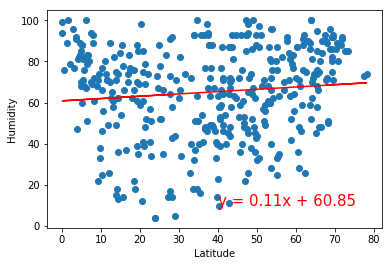

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [32]:
x_values = south_dfw['Lat']
y_values = south_dfw['Humidity']
r_value=l_reg(x_values, y_values, "Humidity")

AttributeError: 'float' object has no attribute 'shape'

The r-squared is: 0.14689473425583055


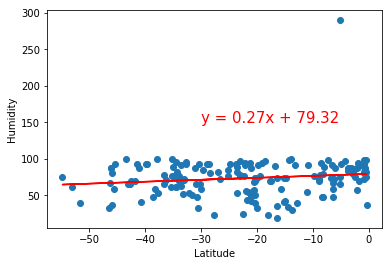

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


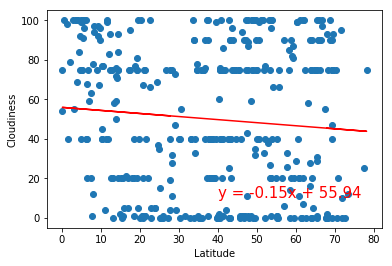

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [39]:
x_values = north_dfw['Lat']
y_values = north_dfw['Cloudiness']
r_value=l_reg(x_values, y_values, "Cloudiness")

AttributeError: 'float' object has no attribute 'shape'

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


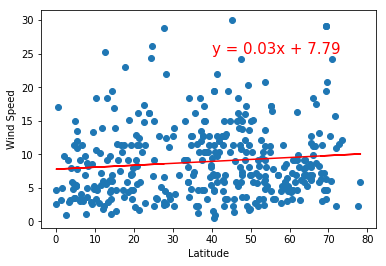

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

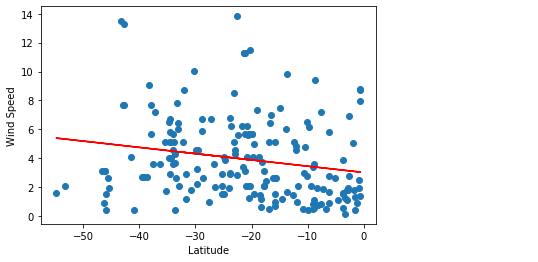

In [38]:
x_values = south_dfw['Lat']
y_values = south_dfw['Wind Speed']
r_value=l_reg(x_values, y_values, "Wind Speed")

The r-squared is: -0.322483077139538


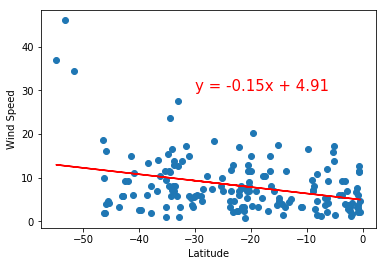